# Selenium

Automates Browsers, Automation web applications for testing purpose

쿠키를 통해 코드 레벨에서 이동 가능

- Rapid feedback to devs
- Finding defects missed by manual testing
- Support for Agile and Extreme Development methodologies

In [ ]:
# !pip install selenium

In [1]:
from selenium.webdriver import Chrome #PhantomJS: JS만 해석하는 엔진, 사라짐

driver = Chrome()

![](<attachment:스크린샷 2025-03-20 오후 12.29.41.png>)
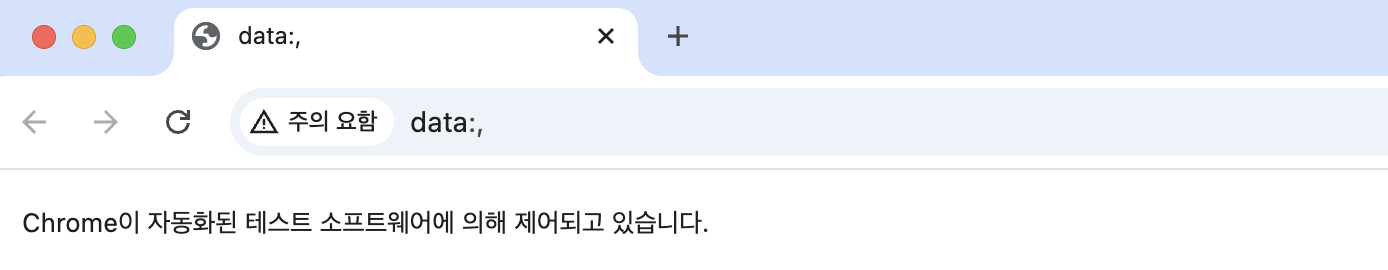

In [ ]:
# driver.close() # 종료 시 반드시 이렇게

In [2]:
driver.window_handles

['6CF7ECCD5D1C94DF6C5F678380E8F7CE']

### 브라우저로 우리가 하는 행동들
클릭, 키보드 입력, GET

In [ ]:
# Selenium => 브라우저(자동화된) => Rendering DOM + Javascript
# 목적: 자동화(나를 대신해서)
# 행위: 특정 요소 지정, 요소 행위를 할 수 있는 상태인지 체크
#                                    ---------- wait(Explict, Implicit-> 전체 느려짐)
# 지정: By.XPATH, By.CSS_SELECTOR ...
# 상태: is_enabled, is_clickable, ...,  +   예외 상황(expected_condition.*)
# 실행: driver.execute_script('자바스크립트')
# 돔: 항상 1개의 DOM을 파싱(새로운 탭/창, 돔 안에 돔이 있을 때 항상 DOM을 변경해줘야 함)
# 쿠키: request <----> selenium (네이버 로그인 -> request, LMS 로그인 -> selenium, 단 domain 조심)

# 언제: 로그인 or DDOS(reCaptcha, 또는 온갖 bot 방지툴)

In [4]:
# driver.get_cookies()
# driver.add_cookie()

In [5]:
driver.get('https://www.naver.com')

In [6]:
from selenium.webdriver.common.by import By

In [8]:
# By.XPATH # X레벨에서 노드를 탐색하는 방식
# .     현재
# ..    이전
# /     루트, 자식
# //    자손
# [@]   attribute

driver.find_elements(By.XPATH, '//body')
# WebElement.session => 현재 DOM의 해당 element의 위치

[<selenium.webdriver.remote.webelement.WebElement (session="c6aa77d2739ad2d52ca0324561d2bd4a", element="f.6CF7ECCD5D1C94DF6C5F678380E8F7CE.d.60F88ACBF795248E6C59A92FD52F16BA.e.95")>]

In [ ]:
driver.find_element(By.XPATH, '//body').tag_name
driver.find_element(By.XPATH, '//body').get_attribute('class')
driver.find_element(By.XPATH, '//body').text

'NAVER\n검색\n검색\n자동완성/최근검색어펼치기\n\n\n메일\n카페\n블로그\n스토어\n뉴스\n증권\n부동산\n지도\n웹툰\n치지직\n추천\n바로가기 펼침\n확장 영역\n페이 바로가기\n톡\n알림\n장바구니\n알림\n뉴스스탠드언론사편집\n엔터\n스포츠LIVE\n경제\n쇼핑투데이\n분야별 뉴스\n노컷뉴스속보\n문화일보속보홍준표 “박정희 부러워했고 YS 개혁성, DJ 유연성, 盧 서민성 좋아했다”\n뉴스홈\n경기일보\n구독\n[속보] 김동연 “최상목 탄핵 추진, 바람직한 길일지 회의적”\n03월 21일 10:20\n프레시안\n구독\n"총 들고 다니면 뭐해!"[손문상의 그림세상]\n03월 21일 10:02\n미디어오늘\n구독\n돈 내고 쓰는 AI검색, 잘못된 답변 쏟아졌다\n03월 21일 10:06\n디지털타임스\n구독\n몸값만 무려 83억…`인도 강형욱`이 샀다는 희귀견 뭐길래\n03월 21일 09:44\n이전 페이지\n언론사 더보기15\n페이지\n전체\n/21\n다음 페이지\n추천・구독\n자동차\n웹툰\n패션뷰티\n푸드\n리빙\n책방\n지식+\n건강\n게임\n웹툰홈요일별웹툰베스트도전웹소설홈시리즈에디션베스트리그시리즈홈웹소설만화\n금요웹툰\n금요웹툰 전체보기\nUP\n광마회귀\nJP / 이히 / 유진성\nUP\n역대급 영지 설계사\n이현민 / 김현수 / 문백경\nUP\n외모지상주의\n박태준\nUP\n나 혼자 만렙 뉴비\nWAN.Z / 스윙뱃 / 메슬로우\nUP\n재혼 황후\n히어리 / 숨풀 / 알파타르트\n사신\n임재원 / 설봉\nUP\n나 혼자 탑에서 농사\n임형 / 이하경 / sdcknight\n천중용문\n김언 / 묵지 / 군주\nUP\nA.I. 닥터\nZAINO / 쿠큐 / 한산이가\nUP\n천하제일 대사형\nYooN / 북미혼\nUP\n어쩌다보니 천생연분\n꿀타래 / 담초\nUP\n유부 감자\n감자\n이번주 가장 많이 본 웹툰\n신작\n완결\n1\n위\n통제구역관리부\n탄광\n2\n위\n고대동물기\n고제형\n매일10시무료\n청소년 관람불가\n3\n위\

In [ ]:
import requests
from requests import request
from requests.compat import urljoin, urlencode
from requests.sessions import Session
from bs4 import BeautifulSoup
import re

resp = request()
dom = BeautifulSoup(resp.text, 'html5lib')
# 위랑 아래랑 다른 DOM
dom = BeautifulSoup(driver.page_source, 'html5lib')
dom.select_one('body')
# response.body => text/html => dom [우리가 하던 방식]
# driver.page_source => text/html [이미 해석이 다 끝난 DOM]

FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

In [ ]:
driver.find_element(By.XPATH, '//body').tag_name
driver.find_element(By.XPATH, '//body').get_attribute('class')
driver.find_element(By.XPATH, '//div[@id="account"]//a').click()
#                         DOM의 자손 중 div, 근데 속성 id가 account인 애, 의 자식 a
# WebElement.session => 현재 DOM의 해당 element의 위치

In [ ]:
# for el in driver.find_elements(By.XPATH, '//form/input[@name]'):
#     print(el.tag_name, el.get_attribute('name'))
userid = driver.find_element(By.XPATH, '//input[@id="id"]')
userpw = driver.find_element(By.XPATH, '//input[@id="pw"]')

In [ ]:
from selenium.webdriver.common.keys import Keys

userid.clear()
userid.send_keys('아이디')
userpw.clear()
userpw.send_keys('비밀번호')

In [ ]:
submit = driver.find_element(By.XPATH, '//form//button[@type="submit"]')
submit.click()

In [ ]:
c = dict()
for line in driver.get_cookies():
    c[line['name']]=line['value']

In [ ]:
import re
resp = get('https://mail.naver.com', cookies=c)
resp.status_code, resp.headers
re.search(r'<title>(.+?)</title>', resp.text).group(1)

In [ ]:
driver.get('https://mail.naver.com')


In [ ]:
# for el in driver.find_elements(By.XPATH, '//div[@class="mail_title"]'):
#     print(el.text)
# 장점: 눈에 보이는 대로 해석
# 단점: Rendering(시간이 필요) + 눈에 안보이는 요소(X)

In [ ]:
from selenium.common.exceptions import *

logout = driver.find_element(By.XPATH, '//a[@id="gnb_logout_button"]')
logout.is_displayed()
# '//[@id="gnb_logout_button"]'

In [ ]:
logout.is_displayed()
# 이때가, 클릭이나 행위가 가능한 상태 => Javascript
# 첫페이지(html) -> <script src=""> -> script 다운로드 -> Event
#            -------------------------------------  빵꾸
# 그러기 때문에, wait 항상 필요함

In [ ]:
# explicit => 특정 대상, 어떤 상태 (일 때까지, 아닐 때까지) 기다림
# implicit => 항상 기다림

In [ ]:
driver.implicitly_wait(10)

In [ ]:
driver.find_element(By.XPATH, '//a[@id="gnb_logout_button"]')

In [ ]:
driver.switch_to.window(driver.window_handles[0])

In [ ]:
logout = driver.find_element(By.XPATH, '//a[@id="gnb_logout_button"]')

logout.click() # toggle popup layer

In [ ]:
from selenium.webdriver.support.expected_conditions import *, element_to_be_clickable
from selenium.webdriver.support.wait import WebDriverWait

In [ ]:
wait = WebDriverWait(driver, 10)

In [ ]:
try:
    wait.until(element_to_be_clickable(logout))
    logout.click()
except:
    print('Timeout')

In [ ]:
driver.window_handles

In [ ]:
driver.switch_to.window(driver.window_handles[0]) # 첫번째 탭
driver.switch_to.window(driver.window_handles[2]) # 마지막 탭
dom = driver.page_source
# ? = driver.find_element

In [ ]:
driver.switch_to.window(driver.window_handles[0])
body = driver.find_element(By.XPATH, '//body')

In [ ]:
body

In [ ]:
driver.switch_to.window(driver.window_handles[2])
# 에러

In [ ]:
driver = Chrome()
driver.get('https://www.naver.com')

In [ ]:
# https://blog.naver.com/its_news/223803373039

In [ ]:
driver.switch_to.window(driver.window_handles[-2])
# 창(탭)을 변경

In [ ]:
iframe = driver.find_element(By.XPATH, '//iframe[@id="mainFrame"]')

In [ ]:
driver.switch_to.frame(iframe)
# 같은 창(탭)에서 DOM 안에 iframe DOM으로 변경
# 카리나의 출연은 ~

In [ ]:
# resp = request('blog.naver.com')
# resp.text => <body><iframe src="">
# resp = request(src)
# resp.text => 

In [ ]:
driver.switch_to.default_content()

In [ ]:
driver.close()